In [1]:
import numpy as np
import h5py

In [2]:
f=h5py.File('shapemodel.h5','r')

In [3]:
f.keys()

[u'keypoints', u'mean_shape', u'pca_basis', u'sigma']

In [188]:
f['keypoints'][:]

array([[21873, 22149, 21653, 21036, 43236, 44918, 46166, 47135, 47914,
        48695, 49667, 50924, 52613, 33678, 33005, 32469, 32709, 38695,
        39392, 39782, 39987, 40154, 40893, 41059, 41267, 41661, 42367,
         8161,  8177,  8187,  8192,  6515,  7243,  8204,  9163,  9883,
         2215,  3886,  4920,  5828,  4801,  3640, 10455, 11353, 12383,
        14066, 12653, 11492,  5522,  6025,  7495,  8215,  8935, 10395,
        10795,  9555,  8836,  8236,  7636,  6915,  5909,  7384,  8223,
         9064, 10537,  8829,  8229,  7629]], dtype=uint16)

In [5]:
f['mean_shape'][:].shape

(159645, 1)

In [6]:
f['pca_basis'][:].shape

(159645, 50)

In [7]:
f['sigma'][:].shape

(50, 1)

In [8]:
from skimage import io
%matplotlib inline

In [9]:
img=io.imread('testface_256.jpg')

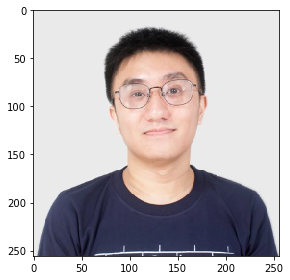

In [10]:
io.imshow(img)

In [11]:
#利用pytorch来进行优化;
import torch
from torch.autograd import Variable

In [172]:
x = Variable(torch.ones(1), requires_grad=True)
y = Variable(torch.ones(1), requires_grad=True)
z=2*x**2+3*y**3

In [173]:
z.backward(retain_variables=True)
x.data.sub_(learning_rate*x.grad.data)


 0.6000
[torch.FloatTensor of size 1]

In [176]:
x.grad.data=torch.FloatTensor([0.0])
z.backward(retain_variables=True)
learning_rate = 0.1
#w1.data -= learning_rate * w1.grad.data
x.data.sub_(learning_rate*x.grad.data)

#手动更新也可行;


 0.1296
[torch.FloatTensor of size 1]

In [179]:
x = Variable(torch.ones(1), requires_grad=True)
y = Variable(torch.ones(1), requires_grad=True)
z=2*x**2+3*y**3
#使用pytorch中的optim优化器;
import torch.optim as optim
optimizer = optim.SGD([x], lr = 0.01)

In [185]:
optimizer.zero_grad() # zero the gradient buffers，必须要置零
z.backward(retain_variables=True)
optimizer.step() # Does the update

#可行！

In [ ]:
#variable:s_mean;alpha;s;S;f;P;R;t;U_proj;d;U_label;sigma;

In [196]:
d=f['keypoints'][:][0]
s_mean=f['mean_shape'][:]   #159645*1;
s=f['pca_basis'][:]    #159645*50;
P=torch.FloatTensor(np.array([[1,0,0],[0,1,0]]))
sigma=f['sigma'][:]   #50*1;

In [217]:
alpha=Variable(torch.FloatTensor(np.zeros((50,1))+1.0/50),requires_grad=True)